In [2]:
#import all libraries

# numpy and pandas help us load and manipulate data
import numpy as np
import pandas as pd

# matplotlib and seaborn are used to plot data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

#sklearn has many machine learning algorithms
from sklearn.linear_model import LinearRegression

# this helps split data for modeling
from sklearn.model_selection import train_test_split

import scipy as sp
import statsmodels.stats.diagnostic as diag
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sms
#import pysal as ps

import statsmodels.tsa.api as smt
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

In [44]:
#Step 1.Load the data from the “train.csv” file into a DataFrame.
dirname = '/Users/carla/Desktop/C540-SQL-Data Preparation/Week 9-10/Exercise/'
df2= open('World_University_RankingsII.csv', 'r')
df1 = open('World University Rankings.csv', 'r')
df2= pd.read_csv('World_University_RankingsII.csv', sep=",")
df1 = pd.read_csv('World University Rankings.csv', sep=",")

In [45]:
#Step 2.df2- Display the type of variables of dataframe1
df2.head()
df2.dtypes
df2.dtypes

world_rank                int64
university_name          object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [46]:
# Step 3:  check the dimension of the tables 
print("The dimension of the table 2 is: ", df2.shape)


The dimension of the table 2 is:  (2200, 14)


In [47]:
#Step 4- Displays type of variables are in the table 
print("Summarized Data")
print(df2.describe(include=['O'])) #summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Summarized Data
                         university_name                   country
count                               2200                      2200
unique                              1024                        59
top     Rutgers University-New Brunswick  United States of America
freq                                   4                       573


In [15]:
#Step 7 - df2- Missing data --- Get the number of missing data points per column
missing_values_count_df2= df2.isnull().sum()
missing_values_count_df2[0:14]

world_rank                0
university_name           0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [49]:
#Step 9- df2 - Removed  column "broad_impact"
df_2 = df2.drop(columns=['broad_impact'], axis=1)
df_2.head()  #New data frame name
missing_values_count_df_2 = df2.isnull().sum() ## get the number of missing data points per column
missing_values_count_df2[0:14] # look at the # of missing points in the  columns

world_rank                0
university_name           0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [50]:
#Step 10 df2-  Display number of columns originally and after changes
print("Columns in original dataset: %d \n" % df2.shape[1])
print("Columns with na's dropped: %d" % df_2.shape[1])


Columns in original dataset: 14 

Columns with na's dropped: 13


In [51]:
#Step12- Rename data frame to df2
df2 =df_2

In [52]:
# df2- Remove dashes  from data set 
df2.replace('-', np.nan)


,world_rank,university_name,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,United States of America,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,United States of America,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,United States of America,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,United States of America,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015


In [53]:
#Step15- Display the amount of NaN values on  df2
y2=df2.isna().sum().sum()
print("The number of  NaN values on df_2  is: ", y2)

The number of  NaN values on df_2  is:  0


In [54]:
#Step15a- Display type of variable for df2 table
df2.dtypes

world_rank                int64
university_name          object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
patents                   int64
score                   float64
year                      int64
dtype: object

 ## Milestone 3


In [55]:
#Remove columns from df2 - 
del df2['year']
del df2['university_name']
del df2['country']

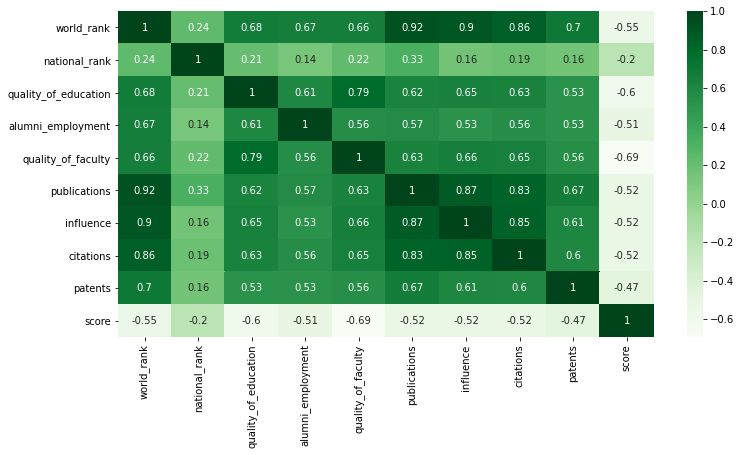

In [56]:
#Heat map- Display  correlation on variables from df2
plt.figure(figsize=(12,6))
ax = sns.heatmap(df2.corr(), cmap = "Greens" , annot=True)
plt.show()


In [57]:
#df2-Display the correlation  of 'world_rank' with all other variables
df2.corr() [['world_rank']].sort_values(by="world_rank", ascending = False)


,world_rank
world_rank,1.000000
publications,0.923037
influence,0.895871
citations,0.856573
patents,0.698214
quality_of_education,0.676166
alumni_employment,0.668529
quality_of_faculty,0.663864
national_rank,0.238553
score,-0.549098


In [58]:
#df2- Display the correlation  of 'publications' with all other variables
df2.corr() [['publications']].sort_values(by="publications", ascending = False)

,publications
publications,1.000000
world_rank,0.923037
influence,0.874952
citations,0.829912
patents,0.671558
quality_of_faculty,0.634423
quality_of_education,0.624657
alumni_employment,0.572096
national_rank,0.326857
score,-0.522111


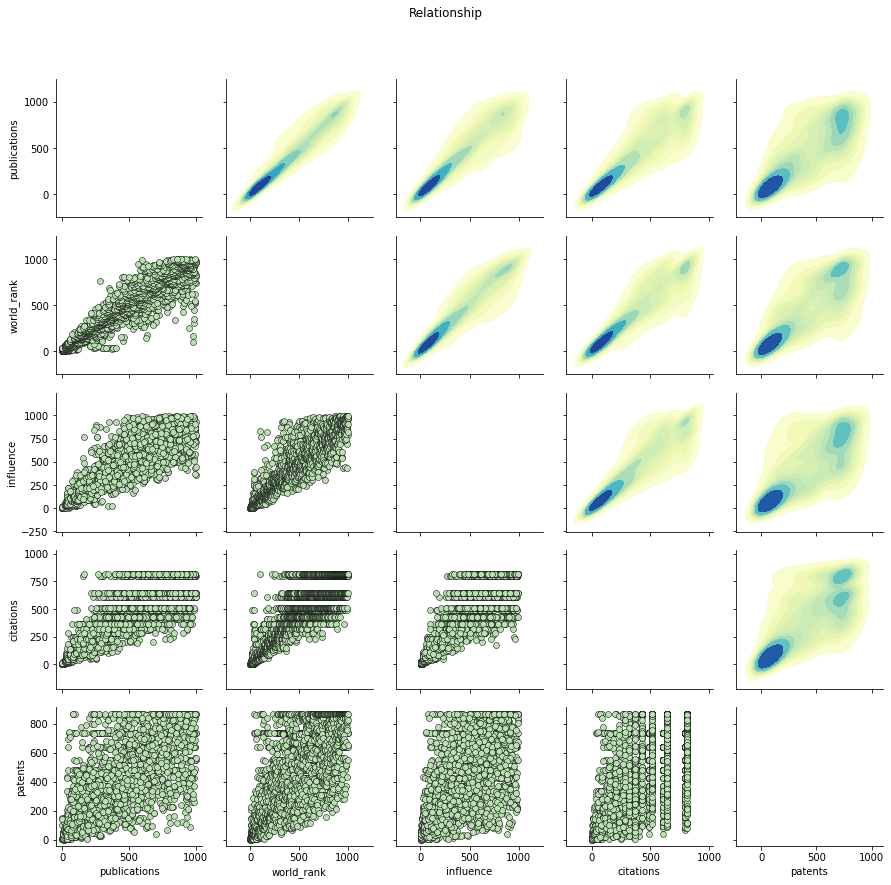

In [60]:
#Ploting a pair grid  to  view dataset using the factor that are the most correlated to the response variable.
g = sns.PairGrid(df2[['publications','world_rank','influence','citations','patents']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, thresh=0.05)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)



I can observe the world rank , publications and influence factors  has a positive linear relationship which is a  good sign.

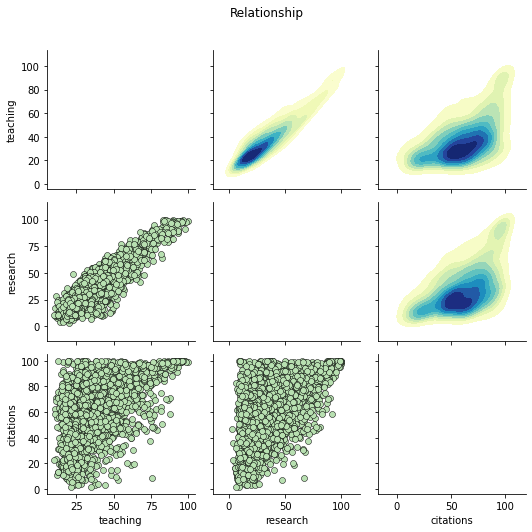

In [61]:
#show the linear relationship between out data
g = sns.PairGrid(df1[['teaching','research','citations']])
g = g.map_upper(sns.kdeplot, cmap='YlGnBu', shade=True, thresh=0.05)
g = g.map_diag(plt.hist, color='#6cbd5e')
g = g.map_lower(sns.scatterplot, color='#b8e0b1', edgecolor='k')

g.fig.tight_layout()
g.fig.suptitle('Relationship')
plt.subplots_adjust(top=0.9)

On the data set 2 , I can observe  teaching , research and citations factors  has a positive linear relationship which is also good sign.

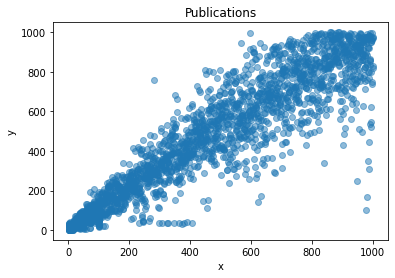

In [64]:
# Check Linearity - world_rank Grades and publications
X1 = df2['publications']
y = df2['world_rank']

# Plot
plt.scatter(X1,y, alpha=0.5)
plt.title('Publications')
plt.xlabel('x')
plt.ylabel('y') 
plt.show()

I can observe a strong  positive linear relationship

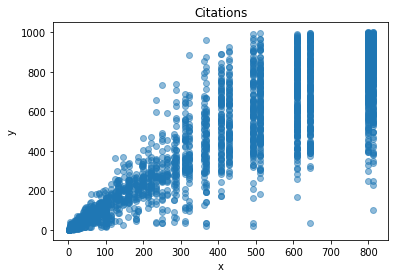

In [65]:
# Display Linearity - citations
X2 = df2['citations']
y = df2['world_rank']

# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Citations')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 Display Linearity graph presenting a slight linear looking but not enough

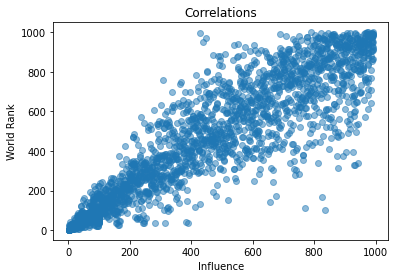

In [66]:
# Check Linearity - influence
X2 = df2['influence']
y = df2['world_rank']
 
# Plot
plt.scatter(X2,y, alpha=0.5)
plt.title('Correlations')
plt.xlabel('Influence')
plt.ylabel('World Rank')
plt.show()

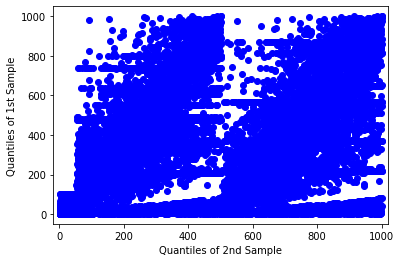

In [69]:
# Create QQ plot
from statsmodels.graphics.gofplots import qqplot_2samples
pp_x = sms.ProbPlot(X)
pp_y = sms.ProbPlot(y)
qqplot_2samples(pp_x, pp_y)
plt.show()

The graph  reflect a positive skew indiating a normal distribution , indicating  good fit for the model.